<a id="section-one"></a>
# <b><span style='color:#f5429b'> 1. |</span> Loading data

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [135]:
df=pd.read_csv('ElectricCarData_Clean.csv')

In [136]:
df.head(2)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [138]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [139]:
df.nunique()

Brand               33
Model              102
AccelSec            55
TopSpeed_KmH        25
Range_Km            50
Efficiency_WhKm     54
FastCharge_KmH      51
RapidCharge          2
PowerTrain           3
PlugType             4
BodyStyle            9
Segment              8
Seats                5
PriceEuro           87
dtype: int64

<a id="section-two"></a>
# <b><span style='color:#f5429b'>2. |</span> Answering the questions

Q: Which car has the fastest 0-100 acceleration?
- **Kangoo Maxi ZE 33 (Renault)**

In [140]:
cm=sns.light_palette('green',as_cmap=True)
df[['Model','Brand','AccelSec']].sort_values(by='AccelSec',ascending=False)[:5].style.background_gradient(cmap=cm).set_precision(2)

,Model,Brand,AccelSec
68,Kangoo Maxi ZE 33,Renault,22.40
66,e-NV200 Evalia,Nissan,14.00
77,EQ forfour,Smart,12.70
57,Twingo ZE,Renault,12.60
43,CITIGOe iV,Skoda,12.30


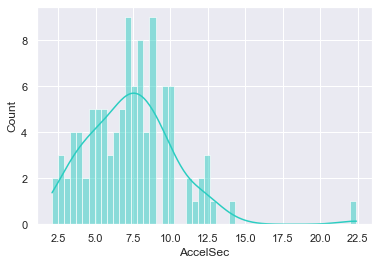

In [141]:
sns.histplot(data=df,x='AccelSec',kde=True,color='#2BCDC1',bins=50)
plt.show()

Q. Which has the highest efficiency?
- **EQV 300 Long (Mercedes)**

In [142]:
df[['Model','Brand','Efficiency_WhKm']].sort_values(by='Efficiency_WhKm',ascending=False)[:5].style.background_gradient(cmap=cm).set_precision(2)

,Model,Brand,Efficiency_WhKm
84,EQV 300 Long,Mercedes,273
90,e-tron S 55 quattro,Audi,270
33,Cybertruck Tri Motor,Tesla,267
67,Cybertruck Dual Motor,Tesla,261
99,e-tron S Sportback 55 quattro,Audi,258


Q: Does a difference in power train effect the range, top speed, efficiency?
- **It affects negatively, the correlation ranges are around -0.5. AWD has the highest efficiency, second RWD, and RWD is the lowest**

In [143]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df2=df.copy()
df2['Brand']=le.fit_transform(df2['Brand'])
df2['Model']=le.fit_transform(df2['Model'])
df2['RapidCharge']=le.fit_transform(df2['RapidCharge'])
df2['PowerTrain']=le.fit_transform(df2['PowerTrain'])
df2['PlugType']=le.fit_transform(df2['PlugType'])
df2['BodyStyle']=le.fit_transform(df2['BodyStyle'])
df2['Segment']=le.fit_transform(df2['Segment'])

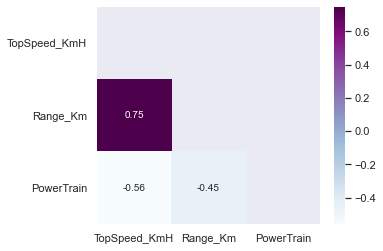

In [144]:
plt.figure(figsize=(5,4))
corr=df2[['TopSpeed_KmH','Range_Km','PowerTrain']].corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,annot=True,mask=mask,cmap='BuPu')
plt.show()

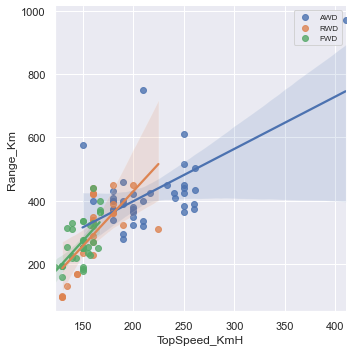

In [145]:
ax=sns.lmplot(x='TopSpeed_KmH',y='Range_Km',hue='PowerTrain',legend=False,data=df)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

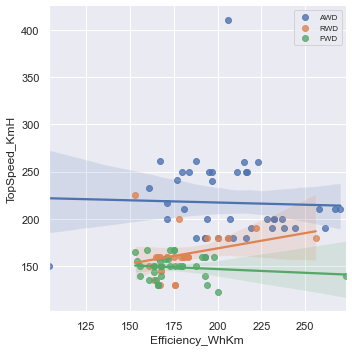

In [146]:
ax=sns.lmplot(x='Efficiency_WhKm',y='TopSpeed_KmH',hue='PowerTrain',legend=False,data=df)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

Q. Which manufacturer has the most number of vehicles?
- **Tesla has 13 models which is the highest quantity of vehicles.**

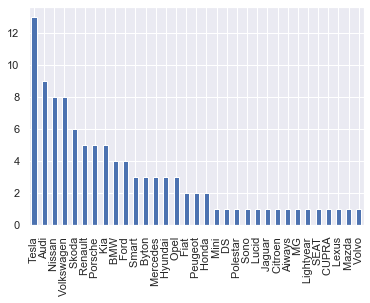

In [147]:
df['Brand'].value_counts().plot(kind='bar')
plt.show()

Q. How does price relate to rapid charging?
- **If 'Rapid Charge' is 'No', the price can be around 25000 euro on average, if it is 'Yes',the price can be a wider range.**

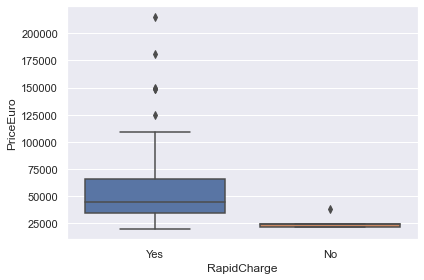

In [148]:
sns.boxplot(y='PriceEuro',x='RapidCharge',data=df)
plt.tight_layout()
plt.show()

<a id="section-three"></a>
# <b><span style='color:#f5429b'> 3. |</span> Regression

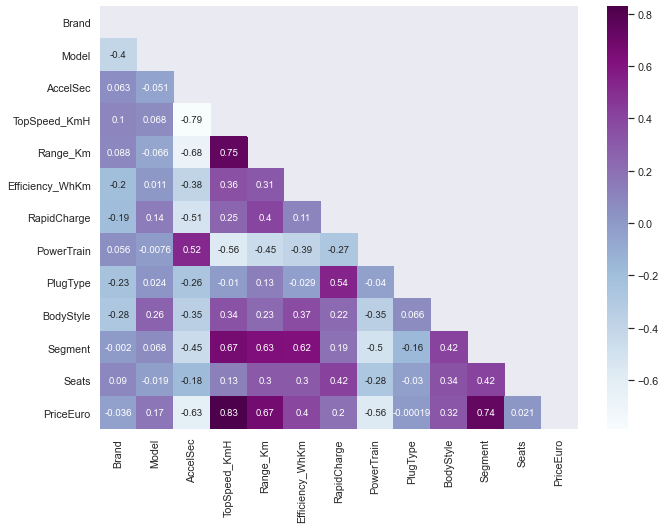

In [149]:
plt.figure(figsize=(11,8),dpi=70)
corr=df2.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,annot=True,mask=mask,cmap='BuPu')
plt.show()

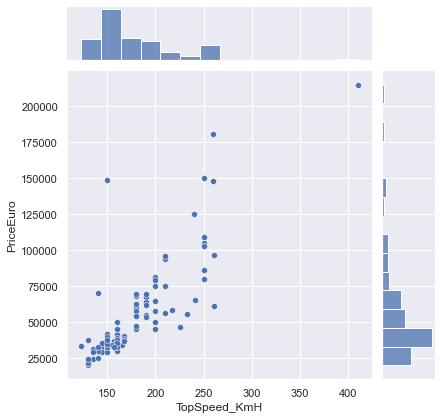

In [150]:
sns.set(rc={'figure.figsize':(5,5)})
sns.jointplot(x='TopSpeed_KmH',y='PriceEuro',data=df)
plt.show()

In [151]:
df2.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,46,4.6,233,450,161,940,1,0,2,7,3,5,55480
1,31,33,10.0,160,270,167,250,1,2,2,1,2,5,30000
2,23,0,4.7,210,400,181,620,1,0,2,2,3,5,56440
3,2,101,6.8,180,360,206,560,1,2,2,6,3,5,68040
4,9,78,9.5,145,170,168,190,1,2,2,1,1,4,32997


In [152]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    int32  
 1   Model            103 non-null    int32  
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    int32  
 8   PowerTrain       103 non-null    int32  
 9   PlugType         103 non-null    int32  
 10  BodyStyle        103 non-null    int32  
 11  Segment          103 non-null    int32  
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int32(7), int64(5), object(1)
memory usage: 8.6+ KB


In [153]:
df2['FastCharge_KmH'].value_counts()[:5]

230    6
440    5
540    5
-      5
380    5
Name: FastCharge_KmH, dtype: int64

In [154]:
df.loc[df['FastCharge_KmH']=='-']

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
57,Renault,Twingo ZE,12.6,135,130,164,-,No,RWD,Type 2,Hatchback,A,4,24790
68,Renault,Kangoo Maxi ZE 33,22.4,130,160,194,-,No,FWD,Type 2,SPV,N,5,38000
77,Smart,EQ forfour,12.7,130,95,176,-,No,RWD,Type 2,Hatchback,A,4,22030
82,Smart,EQ fortwo coupe,11.6,130,100,167,-,No,RWD,Type 2,Hatchback,A,2,21387
91,Smart,EQ fortwo cabrio,11.9,130,95,176,-,No,RWD,Type 2,Cabrio,A,2,24565


In [155]:
df2=df2.drop(index=[57,68,77,82,91],axis=1)

In [156]:
df2=df2.astype(int)

In [157]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Brand            98 non-null     int32
 1   Model            98 non-null     int32
 2   AccelSec         98 non-null     int32
 3   TopSpeed_KmH     98 non-null     int32
 4   Range_Km         98 non-null     int32
 5   Efficiency_WhKm  98 non-null     int32
 6   FastCharge_KmH   98 non-null     int32
 7   RapidCharge      98 non-null     int32
 8   PowerTrain       98 non-null     int32
 9   PlugType         98 non-null     int32
 10  BodyStyle        98 non-null     int32
 11  Segment          98 non-null     int32
 12  Seats            98 non-null     int32
 13  PriceEuro        98 non-null     int32
dtypes: int32(14)
memory usage: 6.1 KB


<a link="section-three-one"></a>
## <b><span style='color:#f5429b'> 3.1. |</span> Linear Regression
  

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
import scipy as sp

#### test_size=0.4, random_state=101

In [159]:
X=df2.drop('PriceEuro',axis=1)
y=df2['PriceEuro']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [160]:
test_predictions=model.predict(X_test)
print('MAE:',mean_absolute_error(y_test,test_predictions))
print('MSE:',mean_squared_error(y_test,test_predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,test_predictions)))

MAE: 13259.64929203547
MSE: 683215241.9795089
RMSE: 26138.38636908386


In [161]:
print(f'Train Score:{model.score(X_train,y_train)}')
print(f'Test Score:{model.score(X_test,y_test)}')


Train Score:0.8666618765259944
Test Score:0.6379654245738009


- It seems better to set test_size=0.5 and random_state=42 in this data

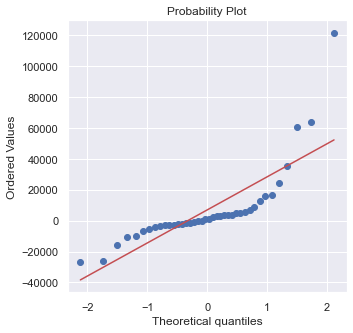

In [162]:
test_res=y_test-test_predictions

fig,ax=plt.subplots(figsize=(5,5))
_=sp.stats.probplot(test_res,plot=ax)

<a link="section-three-two"></a>
## <b><span style='color:#f5429b'>3.2 |</span> Principle Component Regression(PCR)

In [163]:
from sklearn.cross_decomposition import PLSRegression
pls=PLSRegression(n_components=7)
pls.fit(X_train,y_train)

PLSRegression(n_components=7)

In [164]:
test_prediction=pls.predict(X_test)
print('MAE:',mean_absolute_error(y_test,test_predictions))
print('MSE:',mean_squared_error(y_test,test_predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,test_predictions)))

MAE: 13259.64929203547
MSE: 683215241.9795089
RMSE: 26138.38636908386


In [165]:
print(f'Train Score:{pls.score(X_train,y_train)}')
print(f'Test Score:{pls.score(X_test,y_test)}')

Train Score:0.8664378610056672
Test Score:0.6390197193868681


- The scores slightly increased than Linear Regression

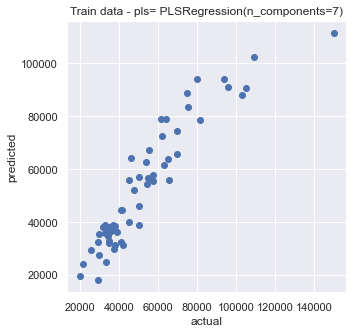

In [166]:
plt.scatter(y_train,pls.predict(X_train))
plt.title('Train data - pls= '+str(pls))
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

<a link="section-three-three"></a>
## <b><span style='color:#f5429b'>3.3 |</span> Gradient Boosting Regression

In [167]:
from sklearn.ensemble import GradientBoostingRegressor

In [168]:
model=GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [169]:
test_predictions=model.predict(X_test)
print('MAE:',mean_absolute_error(y_test,test_predictions))
print('MSE:',mean_squared_error(y_test,test_predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,test_predictions)))

MAE: 12014.145476831896
MSE: 655730412.9283864
RMSE: 25607.233605533933


In [170]:
print(f'Train Score:{model.score(X_train,y_train)}')
print(f'Test Score:{model.score(X_test,y_test)}')

Train Score:0.9996255683537448
Test Score:0.6525295879659332


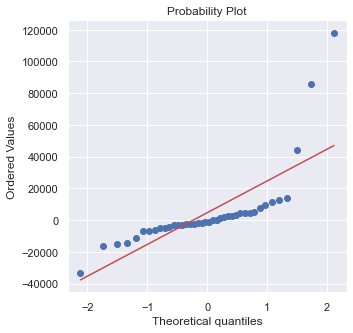

In [171]:
test_res=y_test-test_predictions
fig,ax=plt.subplots(figsize=(5,5))
_=sp.stats.probplot(test_res,plot=ax)

<a link="section-three-four"></a>
## <b><span style='color:#f5429b'>3.1 |</span> XGBoost Regression

In [172]:
import xgboost as xgb

xgb_r=xgb.XGBRegressor(objective='reg:linear',n_estimator=300,seed=123)
xgb_r.fit(X_train,y_train)

[00:01:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:01:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimator=300, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [173]:
test_predictions=xgb_r.predict(X_test)
print('MAE:',mean_absolute_error(y_test,test_predictions))
print('MSE:',mean_squared_error(y_test,test_predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,test_predictions)))

MAE: 13963.034228515626
MSE: 922252881.6421406
RMSE: 30368.616722566418


In [174]:
print(f'Train Score:{xgb_r.score(X_train,y_train)}')
print(f'Test Score:{xgb_r.score(X_test,y_test)}')

Train Score:0.9999999999737812
Test Score:0.511299792619505


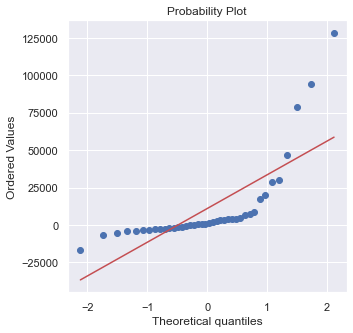

In [175]:
test_res=y_test-test_predictions
fig,ax=plt.subplots(figsize=(5,5))
_=sp.stats.probplot(test_res,plot=ax)

- **XGBRegressor got the highest test score in this data which is 0.83**

<a link='section-three-five'></a>
## <b><span style='color:#f5429b'> 3.5 |</span> XGBoost Bagging Regression

In [176]:
from sklearn.ensemble import BaggingRegressor

In [177]:
model=BaggingRegressor(base_estimator=xgb.XGBRegressor(),n_estimators=100,random_state=0)

In [178]:
 model.fit(X_train,y_train)

BaggingRegressor(base_estimator=XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             gpu_id=None, grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=100, n_jobs=None,
                                             num_parallel_tree=None,
                                             predictor=None, random_state=None, ...),
                 n_estimators=100, random_state=0)

In [179]:
test_prediction=model.predict(X_test)
print('MAE:',mean_absolute_error(y_test,test_predictions))
print('MSE:',mean_squared_error(y_test,test_predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,test_predictions)))

MAE: 13963.034228515626
MSE: 922252881.6421406
RMSE: 30368.616722566418


In [180]:
print(f'Train Score:{model.score(X_train,y_train)}')
print(f'Test Score:{model.score(X_test,y_test)})')

Train Score:0.9787363671653568
Test Score:0.5609097390117834)


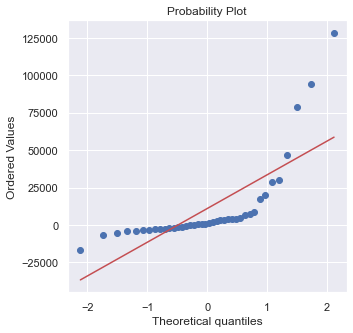

In [181]:
test_res=y_test-test_predictions
fig,ax=plt.subplots(figsize=(5,5))
_=sp.stats.probplot(test_res,plot=ax)

<a link='section-three-six'></a>
## <b><span style='color:#f5429b'> 3.6 |</span> AdaBoost Regression

In [182]:
from sklearn.ensemble import AdaBoostRegressor

In [183]:
ada_reg=AdaBoostRegressor(n_estimators=100,learning_rate=1)

In [184]:
ada_reg.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=1, n_estimators=100)

In [185]:
test_predictions=ada_reg.predict(X_test)
print('MAE:',mean_absolute_error(y_test,test_predictions))
print('MSE:',mean_squared_error(y_test,test_predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,test_predictions)))

MAE: 14675.592679772712
MSE: 830250283.2209947
RMSE: 28814.06398307942


In [186]:
print(f'Train Score:{ada_reg.score(X_train,y_train)}')
print(f'Test Score:{ada_reg.score(X_test,y_test)}')

Train Score:0.9830446574895301
Test Score:0.5600518104477396


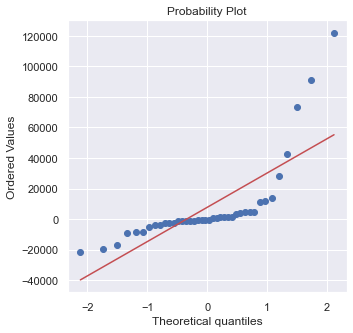

In [187]:
test_res=y_test-test_prediction
fig,ax=plt.subplots(figsize=(5,5))
_=sp.stats.probplot(test_res,plot=ax)